# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten training data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {}
    np.random.seed(42)
    parameters['W1'] = 0.1 * np.random.randn(hidden_size, input_size)
    parameters['b1'] = np.zeros((hidden_size, 1))
    parameters['W2'] = 0.1 * np.random.randn(output_size, hidden_size)
    parameters['b2'] = np.zeros((output_size, 1))
    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)
def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x >= 0, 1, 0)
def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    return sigmoid(x)*(1-sigmoid(x))

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [6]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    cache={}
    cache['Z1'] = np.dot(parameters['W1'], X.T) + parameters['b1']
    cache['A1'] = relu(cache['Z1'])
    cache['Z2'] = np.dot(parameters['W2'], cache['A1']) + parameters['b2']
    cache['A2'] = sigmoid(cache['Z2'])
    return cache['A2'], cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [13]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    epsilon = 1e-10
    y_true = np.clip(y_true, epsilon, 1.0)
    l = -np.mean(np.sum(y_true * np.log(y_pred.T), axis=1))
    return l

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [14]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    gradients = {}
    N = X.shape[0]
    gradients['dZ2'] = cache['A2'] - y_true.T  # Gradient of loss w.r.t Z2
    gradients['dW2'] = (1 / N) * np.dot(gradients['dZ2'], cache['A1'].T)
    gradients['db2'] = (1 / N) * np.sum(gradients['dZ2'], axis=1, keepdims=True)
    gradients['dA1'] = np.dot(parameters['W2'].T, gradients['dZ2'])
    gradients['dZ1'] = gradients['dA1'] * relu_derivative(cache['Z1'])
    gradients['dW1'] = (1 / N) * np.dot(gradients['dZ1'], X)
    gradients['db1'] = (1 / N) * np.sum(gradients['dZ1'], axis=1, keepdims=True)
    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [15]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] = parameters['W1'] - learning_rate*gradients['dW1']
    parameters['b1'] = parameters['b1'] - learning_rate*gradients['db1']
    parameters['W2'] = parameters['W2'] - learning_rate*gradients['dW2']
    parameters['b2'] = parameters['b2'] - learning_rate*gradients['db2']
    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [16]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    print(f'\nTraining with hidden layer size : {hidden_size}')
    parameters = initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    for epoch in range(epochs):
      y_pred, cache = forward_propagation(X_train, parameters)
      loss = compute_loss(y_train, y_pred)
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters = update_parameters(parameters, gradients, learning_rate)
      if epoch % 10 == 0:
        print(f'Epoch:{epoch}, Loss: {loss}')

hidden_sizes = [32, 64, 128]
for size in hidden_sizes:
  train_model(x_train, y_train, size)


Training with hidden layer size : 32
Epoch:0, Loss: 0.747075365756849
Epoch:10, Loss: 1.2701925207476166
Epoch:20, Loss: 1.7598006258833743
Epoch:30, Loss: 1.9394280489081768
Epoch:40, Loss: 1.9716952005970123

Training with hidden layer size : 64
Epoch:0, Loss: 0.7767735331167451
Epoch:10, Loss: 1.6538792060237573
Epoch:20, Loss: 1.8927493330515728
Epoch:30, Loss: 1.9066900578501573
Epoch:40, Loss: 1.859950873098104

Training with hidden layer size : 128
Epoch:0, Loss: 0.707122582854561
Epoch:10, Loss: 1.7916163611912437
Epoch:20, Loss: 1.8224537637623257
Epoch:30, Loss: 1.726212410251447
Epoch:40, Loss: 1.6229631442323096


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [17]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    t = 0
    v = {}
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
        v[key] = np.zeros_like(parameters[key])

    return s, v, t



def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    new_parameters={}
    t+=1
    for key in parameters:
      v[key] = beta1 * v[key] + (1 - beta1) * gradients[f'd{key}']
      s[key] = beta2 * s[key] + (1 - beta2) * (gradients[f'd{key}'] ** 2)
      v_hat = v[key] / (1 - beta1 ** t)
      s_hat = s[key] / (1 - beta2 ** t)
      new_parameters[key] = parameters[key] - learning_rate * v_hat / (np.sqrt(s_hat) + epsilon)
    return new_parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [18]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    print(f'\nTraining with hidden layer size : {hidden_size}')
    parameters = initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    s, v, t = initialize_adam(parameters)
    for epoch in range(epochs):
      y_pred, cache = forward_propagation(X_train, parameters)
      loss = compute_loss(y_train, y_pred)
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters,  v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
      if epoch % 10 == 0:
        print(f'Epoch:{epoch}, Loss: {loss}')

hidden_sizes = [32, 64, 128]
for size in hidden_sizes:
  train_model_with_adam(x_train, y_train, size)


Training with hidden layer size : 32
Epoch:0, Loss: 0.747075365756849
Epoch:10, Loss: 1.3035399714411242
Epoch:20, Loss: 2.0559069858871157
Epoch:30, Loss: 1.8967800871140488
Epoch:40, Loss: 1.4998620787584054

Training with hidden layer size : 64
Epoch:0, Loss: 0.7767735331167451
Epoch:10, Loss: 1.7646254235207044
Epoch:20, Loss: 1.8278203706308722
Epoch:30, Loss: 1.207104595616217
Epoch:40, Loss: 1.0143756227458365

Training with hidden layer size : 128
Epoch:0, Loss: 0.707122582854561
Epoch:10, Loss: 2.12274429860149
Epoch:20, Loss: 1.1574442968542937
Epoch:30, Loss: 0.929568513080127
Epoch:40, Loss: 0.8694096746230241


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [48]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s
def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
      s[key] = beta * s[key] + (1 - beta) * (gradients[f'd{key}'] ** 2)
      parameters[key] = parameters[key] - learning_rate * gradients[f'd{key}'] / (np.sqrt(s[key]) + epsilon)
    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [49]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history=[]
    if optimizer == 'adam':
      v, s, t = initialize_adam(parameters)
      for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters,  v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch}, Loss({optimizer}): {loss}')
    elif optimizer == 'rmsprop':
      s = initialize_rmsprop(parameters)
      for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch}, Loss({optimizer}): {loss}')
    else:
      print('Optimizer not found!')
    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer...
Epoch: 0, Loss(adam): 0.707122582854561
Epoch: 10, Loss(adam): 2.12274429860149
Epoch: 20, Loss(adam): 1.1574442968542937
Epoch: 30, Loss(adam): 0.929568513080127
Epoch: 40, Loss(adam): 0.8694096746230241

Training with RMSprop optimizer...
Epoch: 0, Loss(rmsprop): 0.707122582854561
Epoch: 10, Loss(rmsprop): 1.1143994560761679
Epoch: 20, Loss(rmsprop): 0.9192353667174982
Epoch: 30, Loss(rmsprop): 0.9017445296026564
Epoch: 40, Loss(rmsprop): 0.8435373187128798


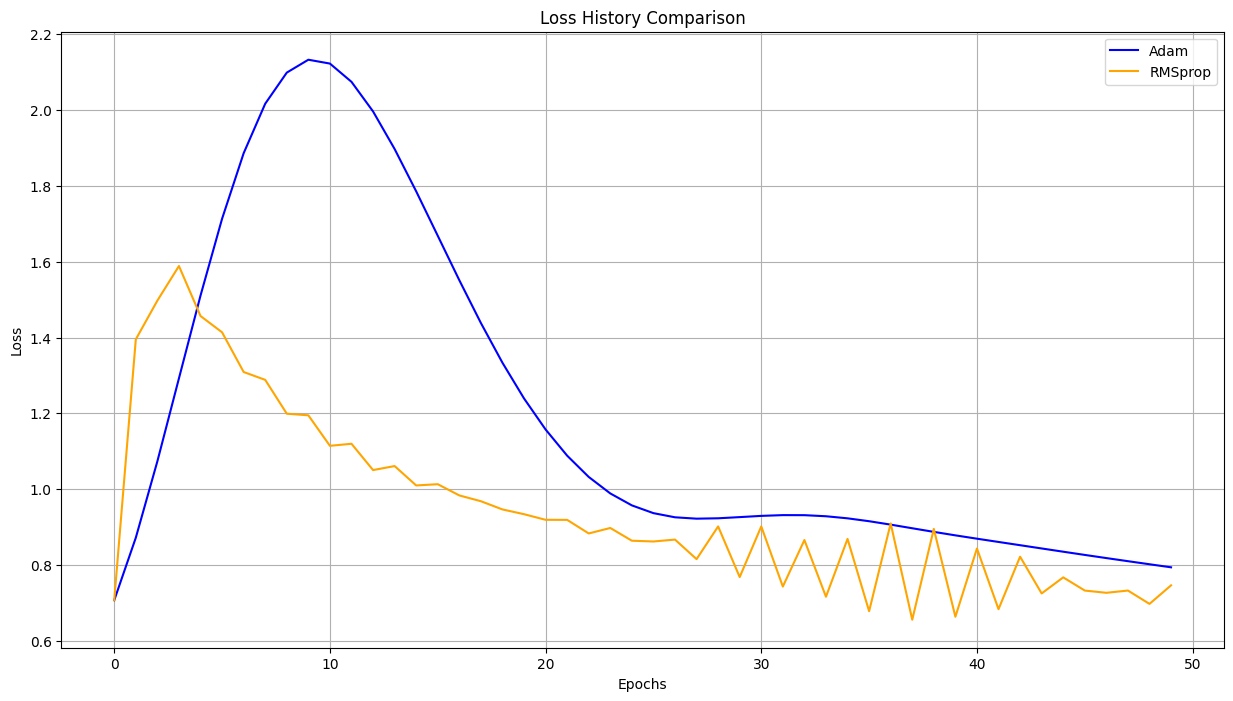

In [50]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print('Training with Adam optimizer...')
    adam_losses = train_model(x_train, y_train, hidden_size, optimizer='adam')
    print('\nTraining with RMSprop optimizer...')
    rmsprop_losses = train_model(x_train, y_train, hidden_size, optimizer='rmsprop')

    plt.figure(figsize=(15, 8))
    plt.plot(adam_losses, label='Adam', color='blue')
    plt.plot(rmsprop_losses, label='RMSprop', color='orange')
    plt.title('Loss History Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_optimizers(x_train, y_train, 128)


## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [51]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
      parameters[key] -= learning_rate * gradients[f'd{key}']
    return parameters

2. Modify the Training Loop


In [52]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    loss_history=[]
    print(f'\nTraining with learning rate: {learning_rate}:')
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch}, Loss(learning rate:{learning_rate}): {loss}')
    return loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001:
Epoch: 0, Loss(learning rate:0.001): 0.707122582854561
Epoch: 10, Loss(learning rate:0.001): 0.9149425579730991
Epoch: 20, Loss(learning rate:0.001): 1.100857408620814
Epoch: 30, Loss(learning rate:0.001): 1.2559350638512508
Epoch: 40, Loss(learning rate:0.001): 1.3818585566062798

Training with learning rate: 0.01:
Epoch: 0, Loss(learning rate:0.01): 0.707122582854561
Epoch: 10, Loss(learning rate:0.01): 1.7916163611912437
Epoch: 20, Loss(learning rate:0.01): 1.8224537637623257
Epoch: 30, Loss(learning rate:0.01): 1.726212410251447
Epoch: 40, Loss(learning rate:0.01): 1.6229631442323096

Training with learning rate: 0.1:
Epoch: 0, Loss(learning rate:0.1): 0.707122582854561
Epoch: 10, Loss(learning rate:0.1): 1.3255884512399982
Epoch: 20, Loss(learning rate:0.1): 1.0530302064060408
Epoch: 30, Loss(learning rate:0.1): 0.9375205092204673
Epoch: 40, Loss(learning rate:0.1): 0.8704961698577038


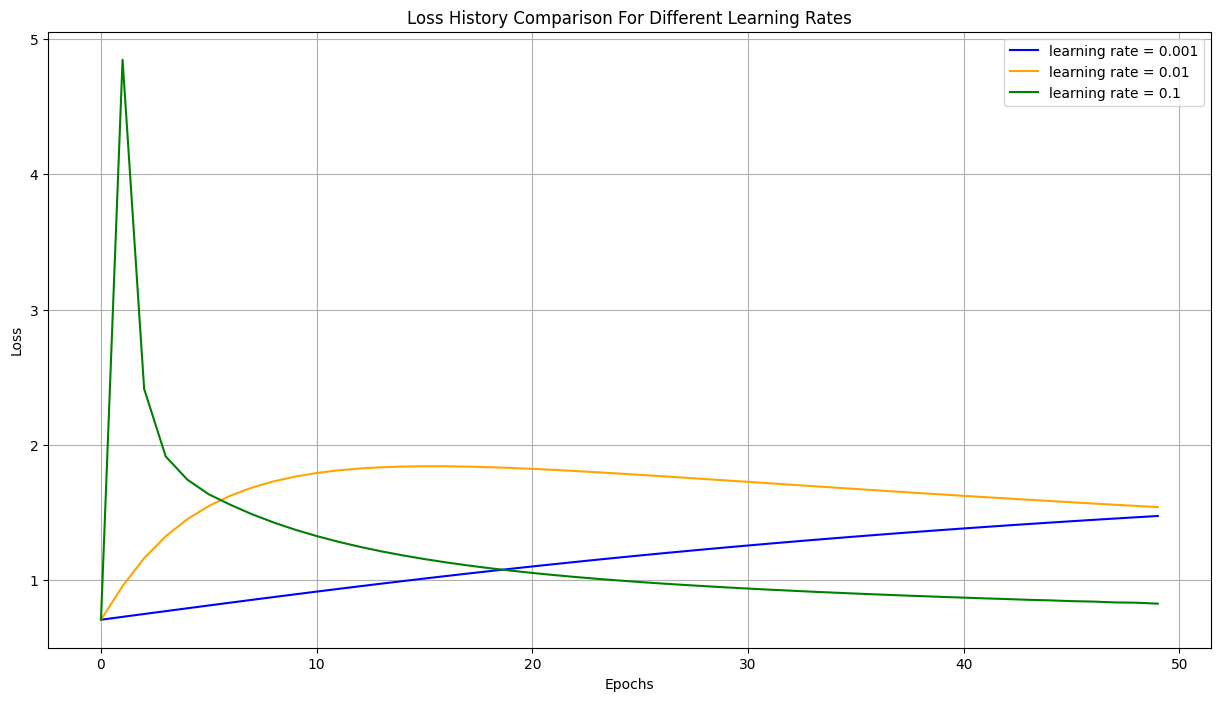

In [53]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    losses={}
    for rate in learning_rates:
      losses[rate] = train_model_with_sgd(X_train, y_train, hidden_size, learning_rate=rate)

    plt.figure(figsize=(15, 8))
    plt.plot(losses[0.001], label='learning rate = 0.001', color='blue')
    plt.plot(losses[0.01], label='learning rate = 0.01', color='orange')
    plt.plot(losses[0.1], label='learning rate = 0.1', color='green')
    plt.title('Loss History Comparison For Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_learning_rates(x_train,y_train,128)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [54]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
    return v
def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    new_parameters={}
    for key in parameters:
      v[key] = beta * v[key] + (1 - beta) * gradients[f'd{key}']
      new_parameters[key] = parameters[key] - learning_rate * v[key]
    return new_parameters, v

3. Modify the Training Loop


In [55]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    loss_history=[]
    parameters = initialize_parameters(X_train.shape[1],hidden_size,y_train.shape[1])
    if optimizer == 'sgd':
      print('Training with Classic SGD...')
      for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        if epoch % 10 == 0:
          print(f'Epoch: {epoch}, Loss(learning rate:{learning_rate}): {loss}')
    elif optimizer=='momentum':
      v = initialize_momentum(parameters)
      print('\nTraining with SGD with Momentum...')
      for epoch in range(epochs):
          y_pred, cache = forward_propagation(X_train, parameters)
          loss = compute_loss(y_train, y_pred)
          loss_history.append(loss)
          gradients = backward_propagation(X_train, y_train, parameters, cache)
          parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
          if epoch % 10 == 0:
            print(f'Epoch: {epoch}, Loss({optimizer}): {loss}')
    else:
        print('Optimizer not found!')
    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch: 0, Loss(learning rate:0.01): 0.707122582854561
Epoch: 10, Loss(learning rate:0.01): 1.7916163611912437
Epoch: 20, Loss(learning rate:0.01): 1.8224537637623257
Epoch: 30, Loss(learning rate:0.01): 1.726212410251447
Epoch: 40, Loss(learning rate:0.01): 1.6229631442323096

Training with SGD with Momentum...
Epoch: 0, Loss(momentum): 0.707122582854561
Epoch: 10, Loss(momentum): 1.7191842336653478
Epoch: 20, Loss(momentum): 2.611881084934823
Epoch: 30, Loss(momentum): 2.376760196802343
Epoch: 40, Loss(momentum): 1.8540088580910798


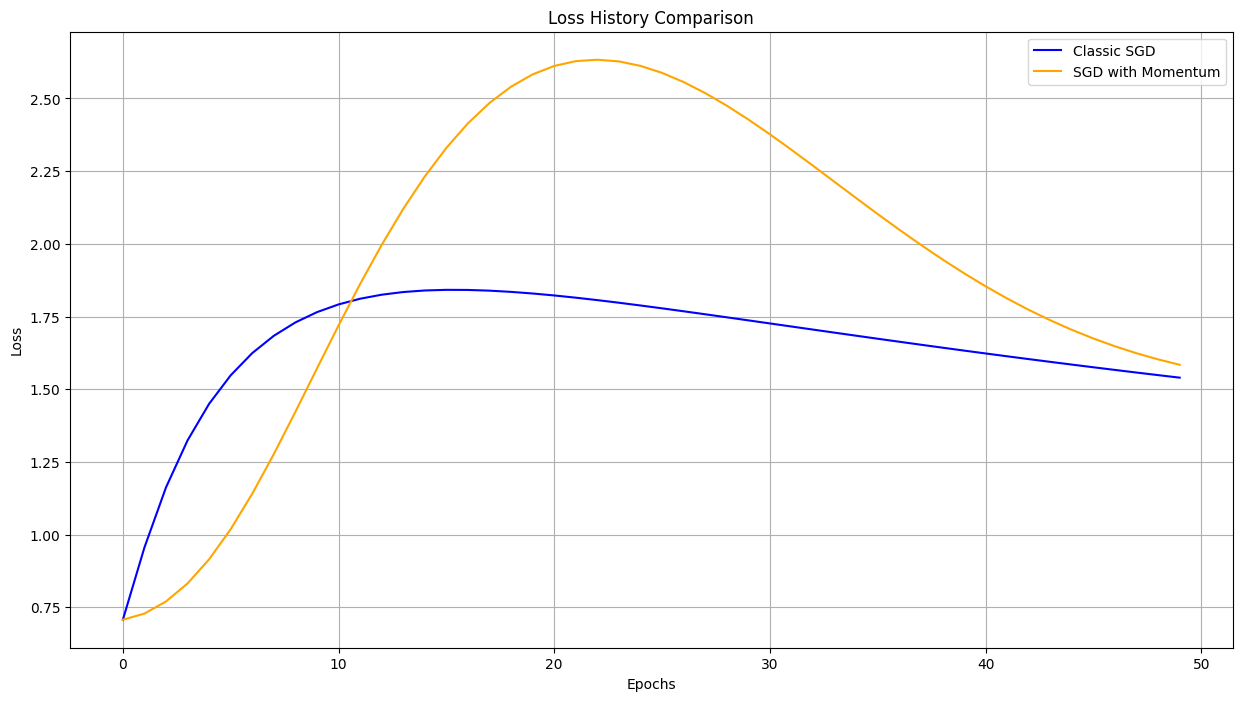

In [56]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    sgd_losses = train_model(x_train, y_train, hidden_size, optimizer='sgd')
    momentum_losses = train_model(x_train, y_train, hidden_size, optimizer='momentum')

    plt.figure(figsize=(15, 8))
    plt.plot(sgd_losses, label='Classic SGD', color='blue')
    plt.plot(momentum_losses, label='SGD with Momentum', color='orange')
    plt.title('Loss History Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_sgd_and_momentum(x_train, y_train, 128)



## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [84]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    num_samples = X_train.shape[0]
    loss_history = []
    accuracy_history = []
    for epoch in range(epochs):
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        for i in range(0, num_samples, batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]
            y_pred, cache = forward_propagation(X_batch, parameters)
            loss = compute_loss(y_batch, y_pred)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        y_true_labels = np.argmax(y_batch, axis=1)
        y_pred_labels = np.argmax(y_pred.T, axis=1)
        accuracy = np.mean(y_true_labels == y_pred_labels) * 100
        loss_history.append(loss)
        accuracy_history.append(accuracy)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    return loss_history, accuracy_history

2. Train the Model with Different Mini-Batch Sizes


In [85]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}
    for batch_size in batch_sizes:
        print(f"\nTraining with mini-batch size: {batch_size}")
        losses, accuracies = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, batch_size=batch_size)

        results[batch_size] = {'loss': losses, 'accuracy': accuracies}

        print(f"Final Loss for batch size {batch_size}: {losses[-1]:.4f}")
        print(f"Final Accuracy for batch size {batch_size}: {accuracies[-1]:.4f}")

compare_mini_batch_sizes(x_train, y_train, 128)


Training with mini-batch size: 16
Epoch 0/50 - Loss: 0.5303, Accuracy: 81.2500
Epoch 10/50 - Loss: 0.2443, Accuracy: 87.5000
Epoch 20/50 - Loss: 0.3023, Accuracy: 81.2500
Epoch 30/50 - Loss: 0.3273, Accuracy: 81.2500
Epoch 40/50 - Loss: 0.1503, Accuracy: 100.0000
Final Loss for batch size 16: 0.2485
Final Accuracy for batch size 16: 87.5000

Training with mini-batch size: 32
Epoch 0/50 - Loss: 0.5011, Accuracy: 84.3750
Epoch 10/50 - Loss: 0.4060, Accuracy: 84.3750
Epoch 20/50 - Loss: 0.5069, Accuracy: 75.0000
Epoch 30/50 - Loss: 0.2815, Accuracy: 87.5000
Epoch 40/50 - Loss: 0.2637, Accuracy: 93.7500
Final Loss for batch size 32: 0.2542
Final Accuracy for batch size 32: 90.6250

Training with mini-batch size: 64
Epoch 0/50 - Loss: 0.5355, Accuracy: 84.3750
Epoch 10/50 - Loss: 0.4573, Accuracy: 84.3750
Epoch 20/50 - Loss: 0.5722, Accuracy: 75.0000
Epoch 30/50 - Loss: 0.3177, Accuracy: 87.5000
Epoch 40/50 - Loss: 0.3538, Accuracy: 90.6250
Final Loss for batch size 64: 0.2631
Final Accura

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [98]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    loss_history = []
    accuracy_history = []
    print("Training with full-batch gradient descent:")
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        y_true_labels = np.argmax(y_train, axis=1)
        y_pred_labels = np.argmax(y_pred.T, axis=1)
        accuracy = np.mean(y_true_labels == y_pred_labels) * 100
        loss_history.append(loss)
        accuracy_history.append(accuracy)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    return loss_history, accuracy_history

In [103]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("Training with full-batch gradient descent:")
    mini_batch_losses, mini_batch_accuracies = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size)
    print(f"\nMini-Batch Final Loss: {mini_batch_losses[-1]:.4f}, Final Accuracy: {mini_batch_accuracies[-1]:.4f}")
    full_batch_losses, full_batch_accuracies = train_model_full_batch(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01)
    print(f"\nFull-Batch Final Loss: {full_batch_losses[-1]:.4f}, Final Accuracy: {full_batch_accuracies[-1]:.4f}")

In [104]:
compare_mini_batch_and_full_batch(x_train, y_train, 128, epochs=50, batch_size=32)

Training with full-batch gradient descent:
Epoch 0/50 - Loss: 0.5011, Accuracy: 84.3750
Epoch 10/50 - Loss: 0.4060, Accuracy: 84.3750
Epoch 20/50 - Loss: 0.5069, Accuracy: 75.0000
Epoch 30/50 - Loss: 0.2815, Accuracy: 87.5000
Epoch 40/50 - Loss: 0.2637, Accuracy: 93.7500

Mini-Batch Final Loss: 0.2542, Final Accuracy: 90.6250
Training with full-batch gradient descent:
Epoch 0/50 - Loss: 0.7071, Accuracy: 14.7450
Epoch 10/50 - Loss: 1.7916, Accuracy: 21.6717
Epoch 20/50 - Loss: 1.8225, Accuracy: 28.6633
Epoch 30/50 - Loss: 1.7262, Accuracy: 36.8967
Epoch 40/50 - Loss: 1.6230, Accuracy: 45.4300

Full-Batch Final Loss: 1.5397, Final Accuracy: 51.0300
